In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud

In [2]:
odf = pd.read_csv('Reviews.csv')
odf['Helpful %'] = np.where(odf['HelpfulnessDenominator'] > 0, odf['HelpfulnessNumerator'] / odf['HelpfulnessDenominator'], -1)
odf['% Upvote'] = pd.cut(odf['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
odf.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty


In [3]:
df_s = odf.groupby(['Score', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))



<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'How helpful users find among user scores')

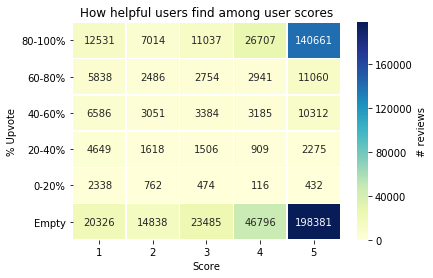

In [4]:
sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')

In [5]:
df = odf[odf['Score'] != 3]
X = df['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_dict)

In [6]:
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 114969
# train records: 394360
# test records: 131454


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model Accuracy: 0.9387238121320005

-Top 20 positive-
Word  Coefficient
   pleasantly     3.328580
emeraldforest     3.199299
      chedder     3.020121
      easiest     2.562417
      solving     2.453120
      blowout     2.444333
     heartier     2.372096
    addicting     2.370796
   unwrapping     2.298308
        herrs     2.296201
     drawback     2.292005
       hooked     2.290150
       skewed     2.284077
       hahaha     2.261967
     downside     2.249761
   correction     2.238011
        whisk     2.193656
       ration     2.188827
       bertie     2.187198
   dishwasher     2.168781

-Top 20 negative-
Word  Coefficient
   unfinished    -2.465662
     tastless    -2.491349
      weakest    -2.598279
    overrated    -2.608597
    cancelled    -2.692528
  unappealing    -2.730268
      furious    -2.741859
   oversalted    -2.752695
    deceptive    -2.821880
disappointing    -2.822388
  undrinkable    -2.825841
  embarrassed    -2.828442
    redeeming    -2.872401


In [7]:
text_fit(X, y, c, DummyClassifier(),0)

# features: 114969
# train records: 394360
# test records: 131454
Model Accuracy: 0.7355652928020449


In [8]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 114969
# train records: 394360
# test records: 131454
Model Accuracy: 0.9346767690598993

-Top 20 positive-
Word  Coefficient
     great    13.722120
 delicious    12.147898
      best    12.014930
   perfect    10.605235
 excellent     9.860647
     loves     9.581166
    highly     9.036922
      love     8.363467
 wonderful     7.966267
   amazing     7.796380
   awesome     7.631793
      good     7.339033
pleasantly     7.247853
      nice     7.190181
    hooked     7.020324
     yummy     6.956705
  favorite     6.941073
   pleased     6.929279
    smooth     6.883905
 fantastic     6.728033

-Top 20 negative-
Word  Coefficient
         waste    -5.624240
          poor    -5.719865
   undrinkable    -5.724258
          yuck    -6.012936
         stale    -6.151746
         worse    -6.277542
         bland    -6.319814
    disgusting    -6.552199
          weak    -6.558914
        return    -6.686735
         threw    -6.731252
     tasteless    -6.837401
 unfortun

In [9]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 3933179
# train records: 394360
# test records: 131454
Model Accuracy: 0.9454714196601093

-Top 20 positive-
Word  Coefficient
           great    21.054577
            best    17.831601
       delicious    17.012872
         perfect    14.624623
           loves    13.611160
            love    13.272387
       excellent    13.144334
            good    11.418326
       wonderful    11.321080
            nice    10.811514
        favorite    10.594919
         amazing     9.691426
         awesome     9.371318
            easy     9.143947
         pleased     8.947594
           happy     8.906614
          smooth     8.715677
           yummy     8.592553
          highly     8.466686
highly recommend     8.423070

-Top 20 negative-
Word  Coefficient
         maybe    -7.807009
        hoping    -8.129029
     tasteless    -8.250228
         money    -8.319548
         worse    -8.353005
       thought    -8.564717
    disgusting    -8.764723
         bland    -9.145294
